In [4]:
import pandas as pd

df = pd.read_csv("/content/IMDB-Movie-Data (1).csv")
print(df.shape)
print(df.columns)
df.head()


(1000, 12)
Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')


,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df['Revenue (Millions)'] = pd.to_numeric(df['Revenue (Millions)'], errors='coerce')
df['Metascore'] = pd.to_numeric(df['Metascore'], errors='coerce')

In [7]:
df['Primary Genre'] = df['Genre'].apply(lambda x: x.split(',')[0])

In [8]:
genre_ratings = df.groupby('Primary Genre')['Rating'].mean().sort_values(ascending=False)
print(genre_ratings)

Primary Genre
Animation    7.324490
Biography    7.318750
Drama        6.954872
Adventure    6.908000
Mystery      6.876923
Crime        6.807042
Romance      6.600000
Action       6.592491
Comedy       6.493143
Thriller     5.960000
Horror       5.867391
Fantasy      5.850000
Sci-Fi       4.966667
Name: Rating, dtype: float64


In [9]:
director_counts = df['Director'].value_counts()
top_directors = director_counts[director_counts >= 3].index
director_ratings = df[df['Director'].isin(top_directors)].groupby('Director')['Rating'].mean().sort_values(ascending=False)
print(director_ratings)


Director
Christopher Nolan     8.680000
Martin Scorsese       7.920000
Quentin Tarantino     7.900000
Wes Anderson          7.900000
David Fincher         7.820000
                        ...   
Dennis Dugan          5.825000
Paul W.S. Anderson    5.766667
M. Night Shyamalan    5.533333
Kevin Smith           5.433333
Eli Roth              5.266667
Name: Rating, Length: 91, dtype: float64


In [10]:
ratings_over_years = df.groupby('Year')['Rating'].mean()
print(ratings_over_years)


Year
2006    7.125000
2007    7.133962
2008    6.784615
2009    6.960784
2010    6.826667
2011    6.838095
2012    6.925000
2013    6.812088
2014    6.837755
2015    6.602362
2016    6.436700
Name: Rating, dtype: float64


In [11]:
corr = df['Revenue (Millions)'].corr(df['Rating'])
print("Correlation:", corr)


Correlation: 0.21765389419105993


/tmp/ipython-input-939065162.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette="viridis")


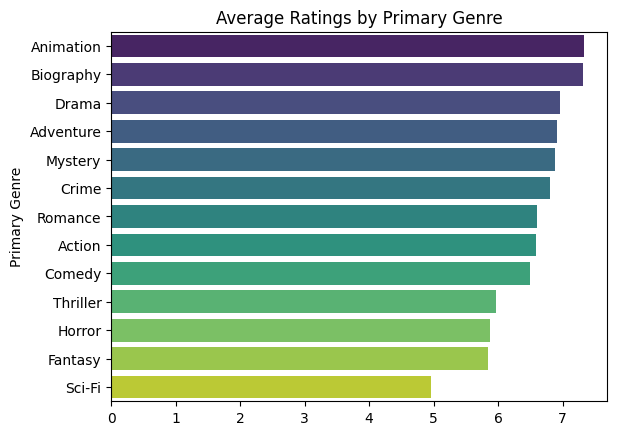

/tmp/ipython-input-939065162.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=director_ratings.values, y=director_ratings.index, palette="magma")


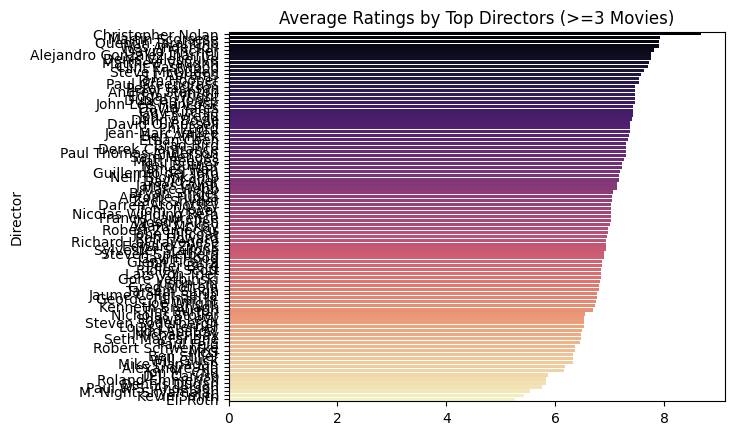

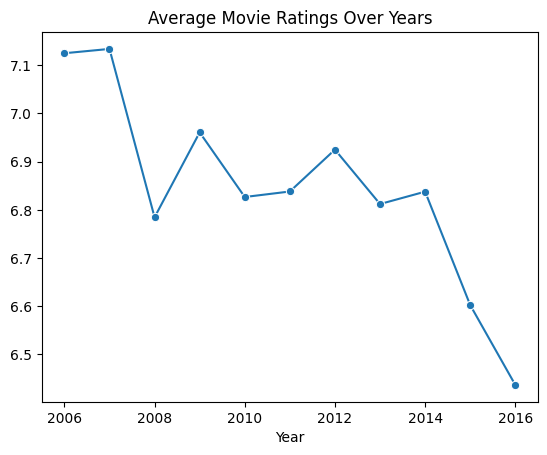

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Genres by rating
sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette="viridis")
plt.title("Average Ratings by Primary Genre")
plt.show()

# Directors by rating
sns.barplot(x=director_ratings.values, y=director_ratings.index, palette="magma")
plt.title("Average Ratings by Top Directors (>=3 Movies)")
plt.show()

# Ratings over years
sns.lineplot(x=ratings_over_years.index, y=ratings_over_years.values, marker='o')
plt.title("Average Movie Ratings Over Years")
plt.show()
